In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import os

## Data Loading and Cleaning

In [3]:
openpl = pd.read_csv("/Users/natashamehta/Desktop/aml_project/openpowerlifting.csv")

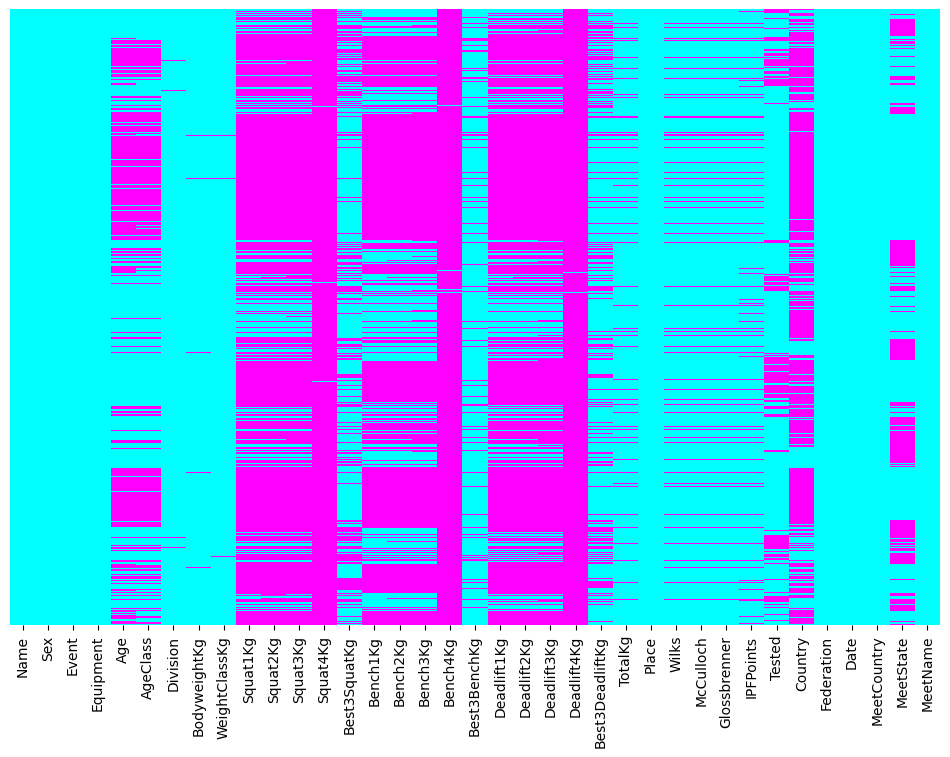

In [4]:
#Checking for missing data
plt.figure(figsize=(12,8))
sns.heatmap(openpl.isnull(), cmap='cool', cbar=False, yticklabels=False)
plt.show()

In [5]:
openpl.drop(['Squat4Kg','Bench4Kg','Deadlift4Kg'],axis=1,inplace=True)

In [6]:
openpl['Date'] = pd.to_datetime(openpl['Date'])
openpl['Month'] = openpl['Date'].apply(lambda x:x.month)
openpl['Year'] = openpl['Date'].apply(lambda x:x.year)

In [7]:
#straps and wraps are the same, therefore we merge them into one category

In [8]:
def strapswraps(x):
    if x == 'Straps':
        return 'Wraps'
    return x

In [9]:
openpl['Equipment'] = openpl['Equipment'].apply(strapswraps)

#We cannot use this column to eliminate duplicate data

In [10]:
unique_div = openpl['Division'].nunique()
print(unique_div)

4842


In [11]:
#dropping duplicate records
openpl.drop_duplicates(inplace=True)

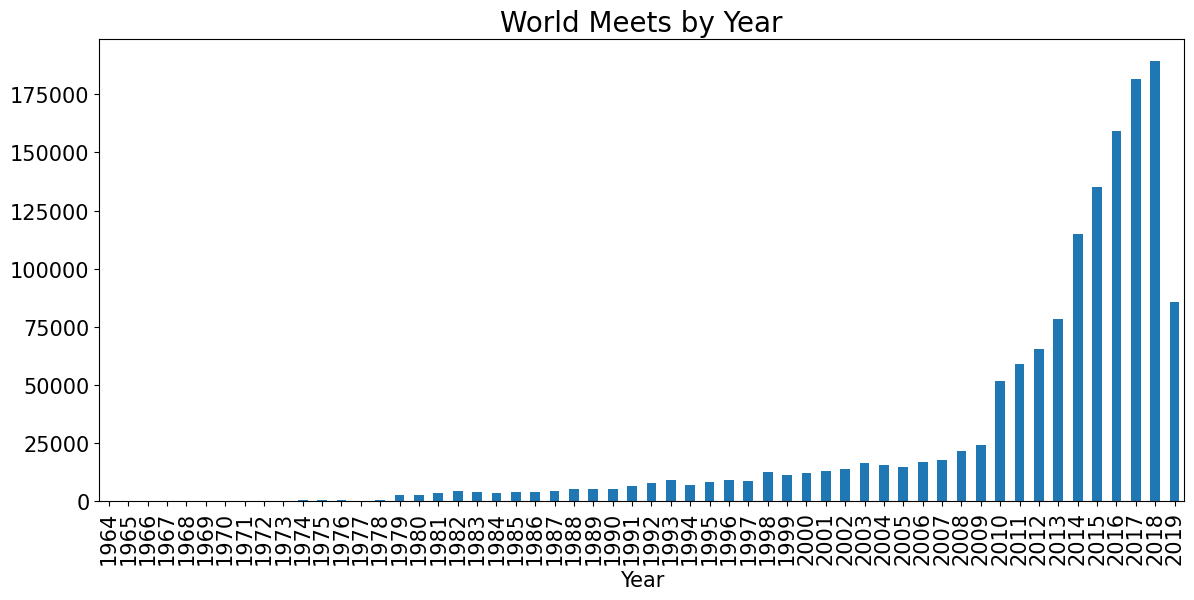

In [12]:
plt.figure(figsize=(14,6))
openpl.groupby(['Year'])['Year'].count().plot(kind='bar')
plt.title('World Meets by Year',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [13]:
#We see that weightlifting as a sport has become increasingly popular over the years
##Looking at the count of participants by year graph, we can clearly see that there is incomplete data for 2019, therefore we drop all records for that year

In [14]:
openpl = openpl[openpl['Year'] != 2019]

In [15]:
openpl['Year'].unique()

array([2018, 2015, 2013, 2014, 2016, 2017, 2012, 2001, 2011, 2002, 2010,
       2007, 2008, 2006, 2004, 2005, 2009, 2003, 1999, 1998, 1997, 2000,
       1994, 1993, 1988, 1995, 1996, 1991, 1989, 1992, 1990, 1987, 1981,
       1979, 1983, 1982, 1985, 1984, 1970, 1986, 1967, 1980, 1969, 1976,
       1968, 1972, 1965, 1974, 1977, 1971, 1966, 1975, 1973, 1978, 1964])

## Exploratory Data Analysis

#Gender Analysis

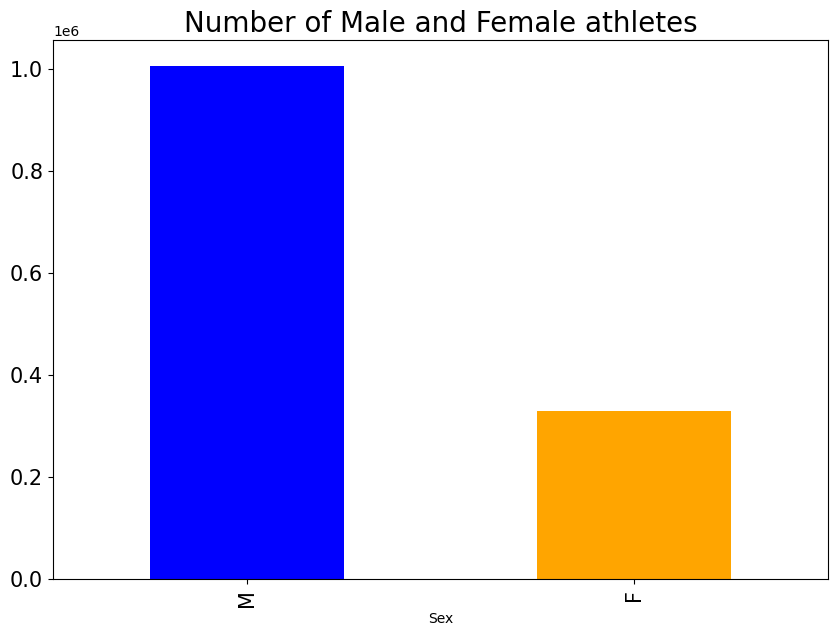

Percentage of Male lifters: 75%

Sex
M    1006142
F     328587
Name: count, dtype: int64


In [16]:
plt.figure(figsize=(10,7))
openpl['Sex'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Male and Female athletes', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print('Percentage of Male lifters: {}%\n' .format(round(len(openpl[openpl['Sex'] == 'M']) / len(openpl) * 100), 4))
print(openpl['Sex'].value_counts())


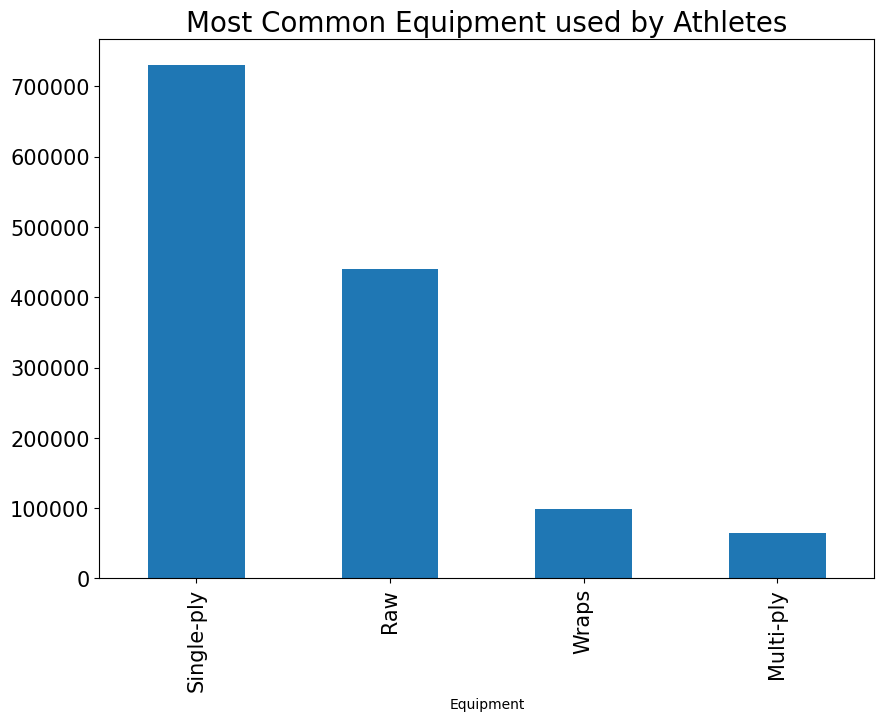

Equipment used: 

Equipment
Single-ply    730084
Raw           440806
Wraps          99474
Multi-ply      64365
Name: count, dtype: int64


In [17]:
plt.figure(figsize=(10,7))
openpl['Equipment'].value_counts().plot(kind='bar')
plt.title('Most Common Equipment used by Athletes',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print('Equipment used: \n')
print(openpl['Equipment'].value_counts())

## Weight Analysis


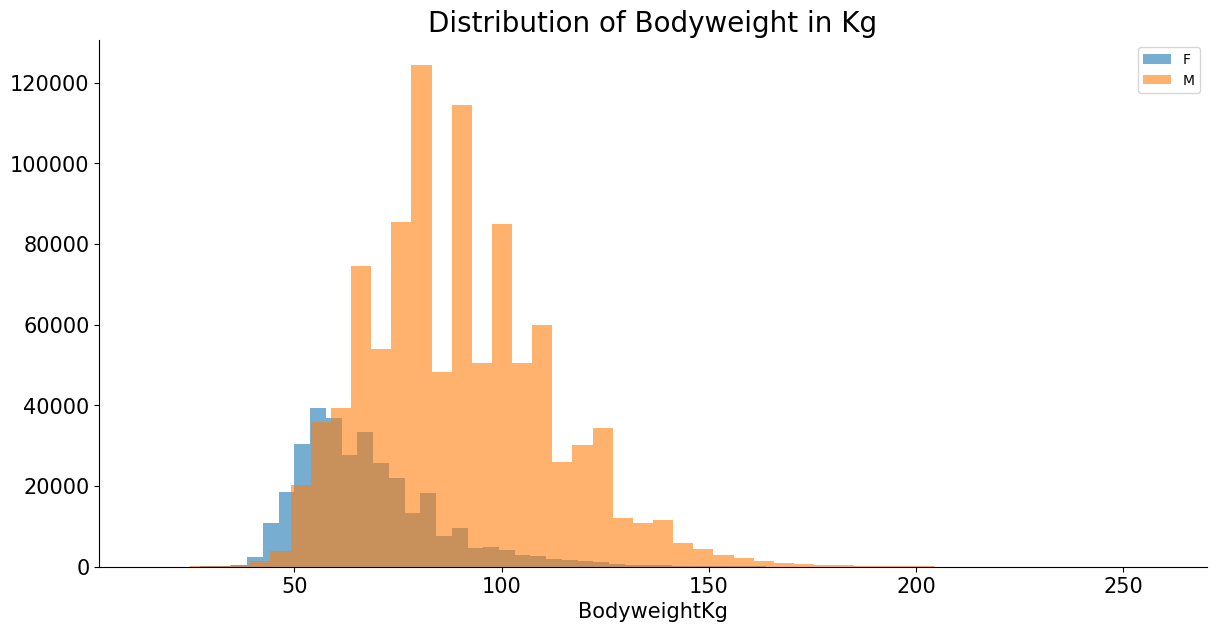

In [18]:
wt = sns.FacetGrid(openpl, hue='Sex', height=6, aspect=2, legend_out=True)
wt = wt.map(plt.hist,'BodyweightKg',bins=50,alpha=0.6)
plt.title('Distribution of Bodyweight in Kg', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('BodyweightKg', fontsize=15)
plt.legend(loc=1)
plt.show()

#male lifters are heavier than female lifters

In [19]:
def fill_na_age(x):
    if isinstance(x, (int, float)):
        return x
    k = x.split("-")
    mean = np.mean([pd.to_numeric(k[0]), pd.to_numeric(k[1])])
    return mean
    
openpl["Age"] = openpl.apply(lambda x: x["Age"] if not pd.isna(x["Age"]) else fill_na_age(x["AgeClass"]), axis=1)

In [20]:
def age_calc(x):
    if(x < 10.0):
        return "05-10"
    elif(x >= 10.0 and x < 20.0):
        return "10-20"
    elif(x >= 20.0 and x < 30.0):
        return "20-30"
    elif(x >= 30.0 and x < 40.0):
        return "30-40"
    elif(x >= 40.0 and x < 50.0):
        return "40-50"
    elif(x >= 50.0 and x < 60.0):
        return "50-60"
    elif(x >= 60.0 and x < 70.0):
        return "60-70"
    elif(x >= 70.0 and x < 80.0):
        return "70-80"
    elif(x >= 80.0 and x < 90.0):
        return "80-90"
    elif(x > 90.0):
        return "90-100"
    else:
        return pd.NA
    
openpl['ageCategory'] = pd.DataFrame(openpl.Age.apply(lambda x : age_calc(x)))

In [21]:
openpl.ageCategory.value_counts()

ageCategory
20-30     267275
10-20     147251
30-40     145576
40-50     106200
50-60      56129
60-70      23222
70-80       7974
05-10       1149
80-90        784
90-100       264
Name: count, dtype: int64

In [22]:
firstPlace = openpl[(openpl.Place == '1')]

In [23]:
First_Place_Male = firstPlace[(firstPlace.Sex == 'M')]
First_Place_Female = firstPlace[(firstPlace.Sex == 'F')]

In [24]:
First_Place_Male = First_Place_Male[np.isfinite(First_Place_Male['Age'])]

In [25]:
Unique_Age_Male = First_Place_Male.Age.unique()

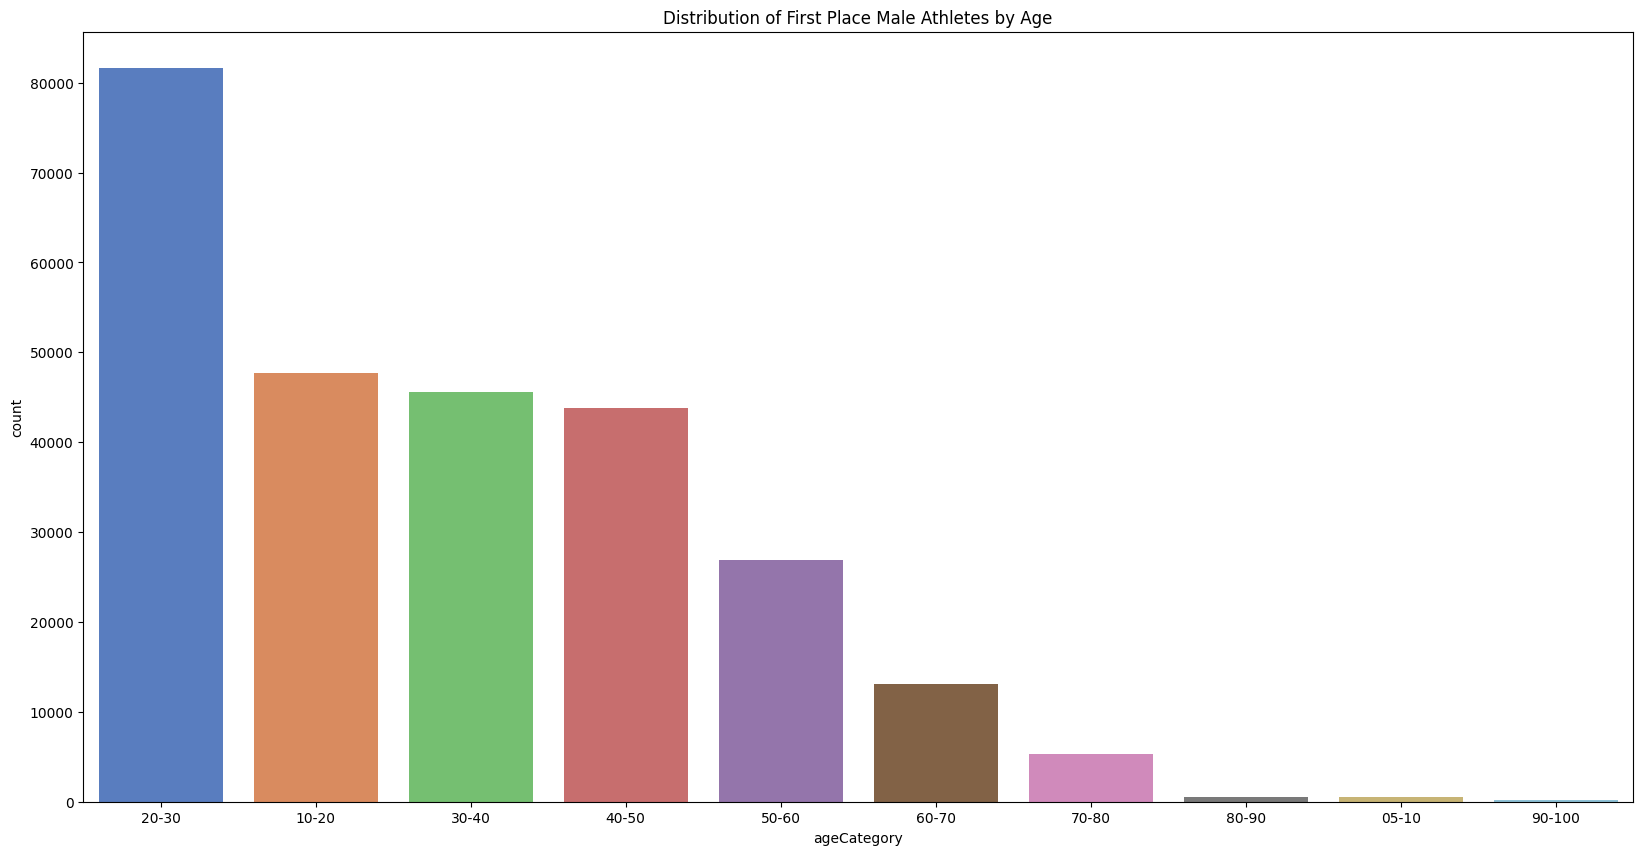

In [26]:
First_Place_Male_cleaned = First_Place_Male.dropna(subset=['ageCategory'])

plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(data=First_Place_Male_cleaned, x="ageCategory", palette="muted", order=First_Place_Male_cleaned["ageCategory"].value_counts().index)
plt.title('Distribution of First Place Male Athletes by Age')
plt.show()

In [27]:
First_Place_Male.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Best3DeadliftKg',
       'TotalKg', 'Place', 'Wilks', 'McCulloch', 'Glossbrenner', 'IPFPoints',
       'Tested', 'Country', 'Federation', 'Date', 'MeetCountry', 'MeetState',
       'MeetName', 'Month', 'Year', 'ageCategory'],
      dtype='object')

In [28]:
First_Place_Female = First_Place_Female[np.isfinite(First_Place_Female['Age'])]

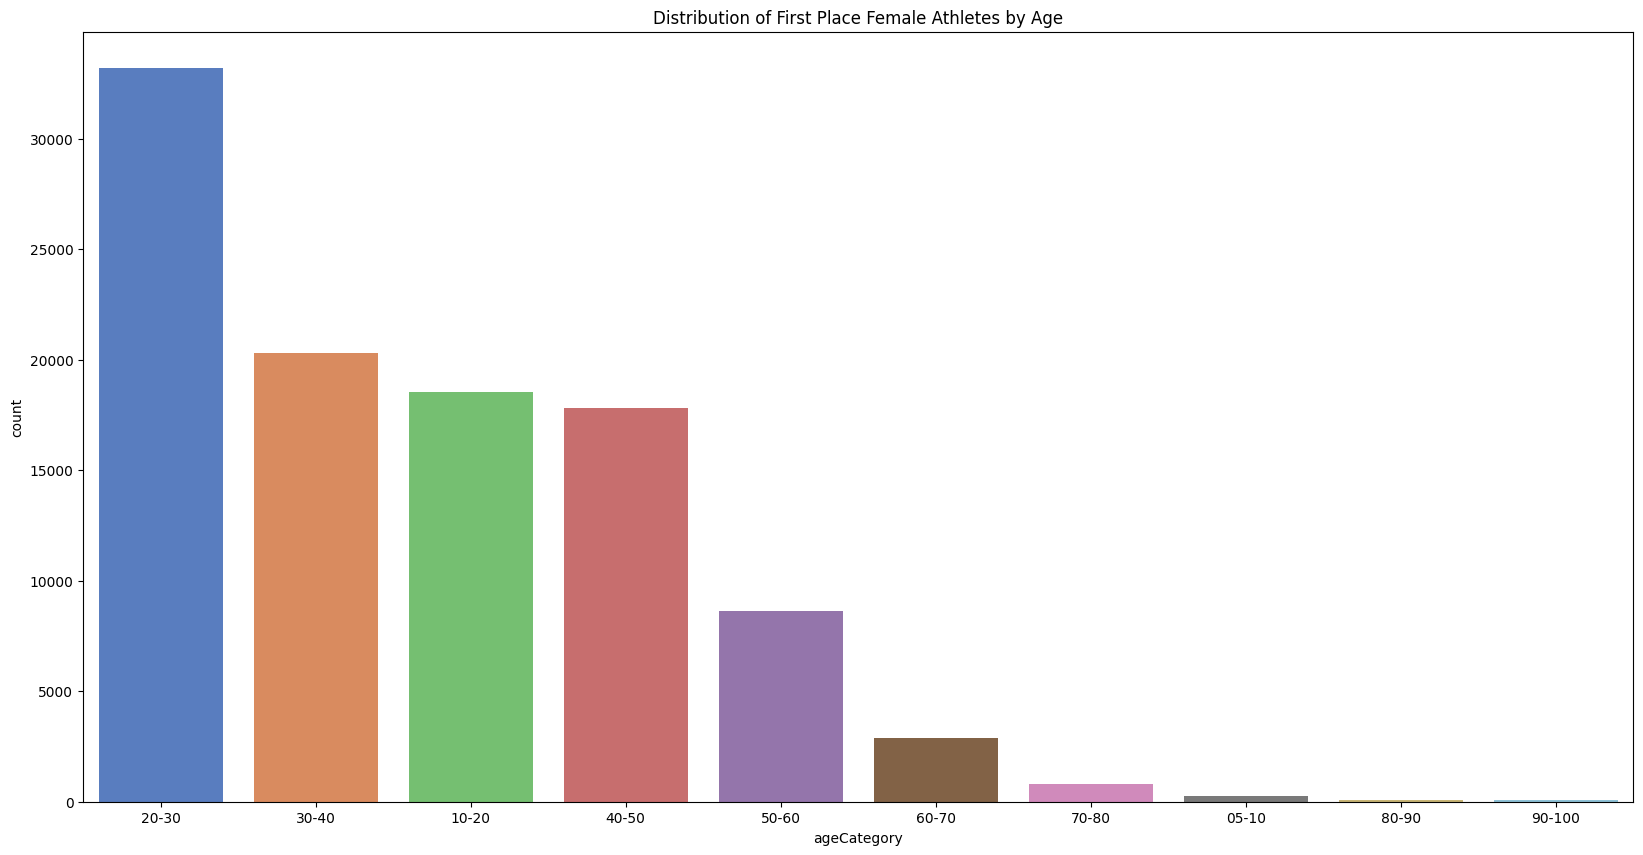

In [29]:
First_Place_Female_cleaned = First_Place_Female.dropna(subset=['ageCategory'])

plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(data=First_Place_Female_cleaned, x="ageCategory", palette="muted", order=First_Place_Female_cleaned["ageCategory"].value_counts().index)
plt.title('Distribution of First Place Female Athletes by Age')
plt.show()

## Best Lift per Age Category

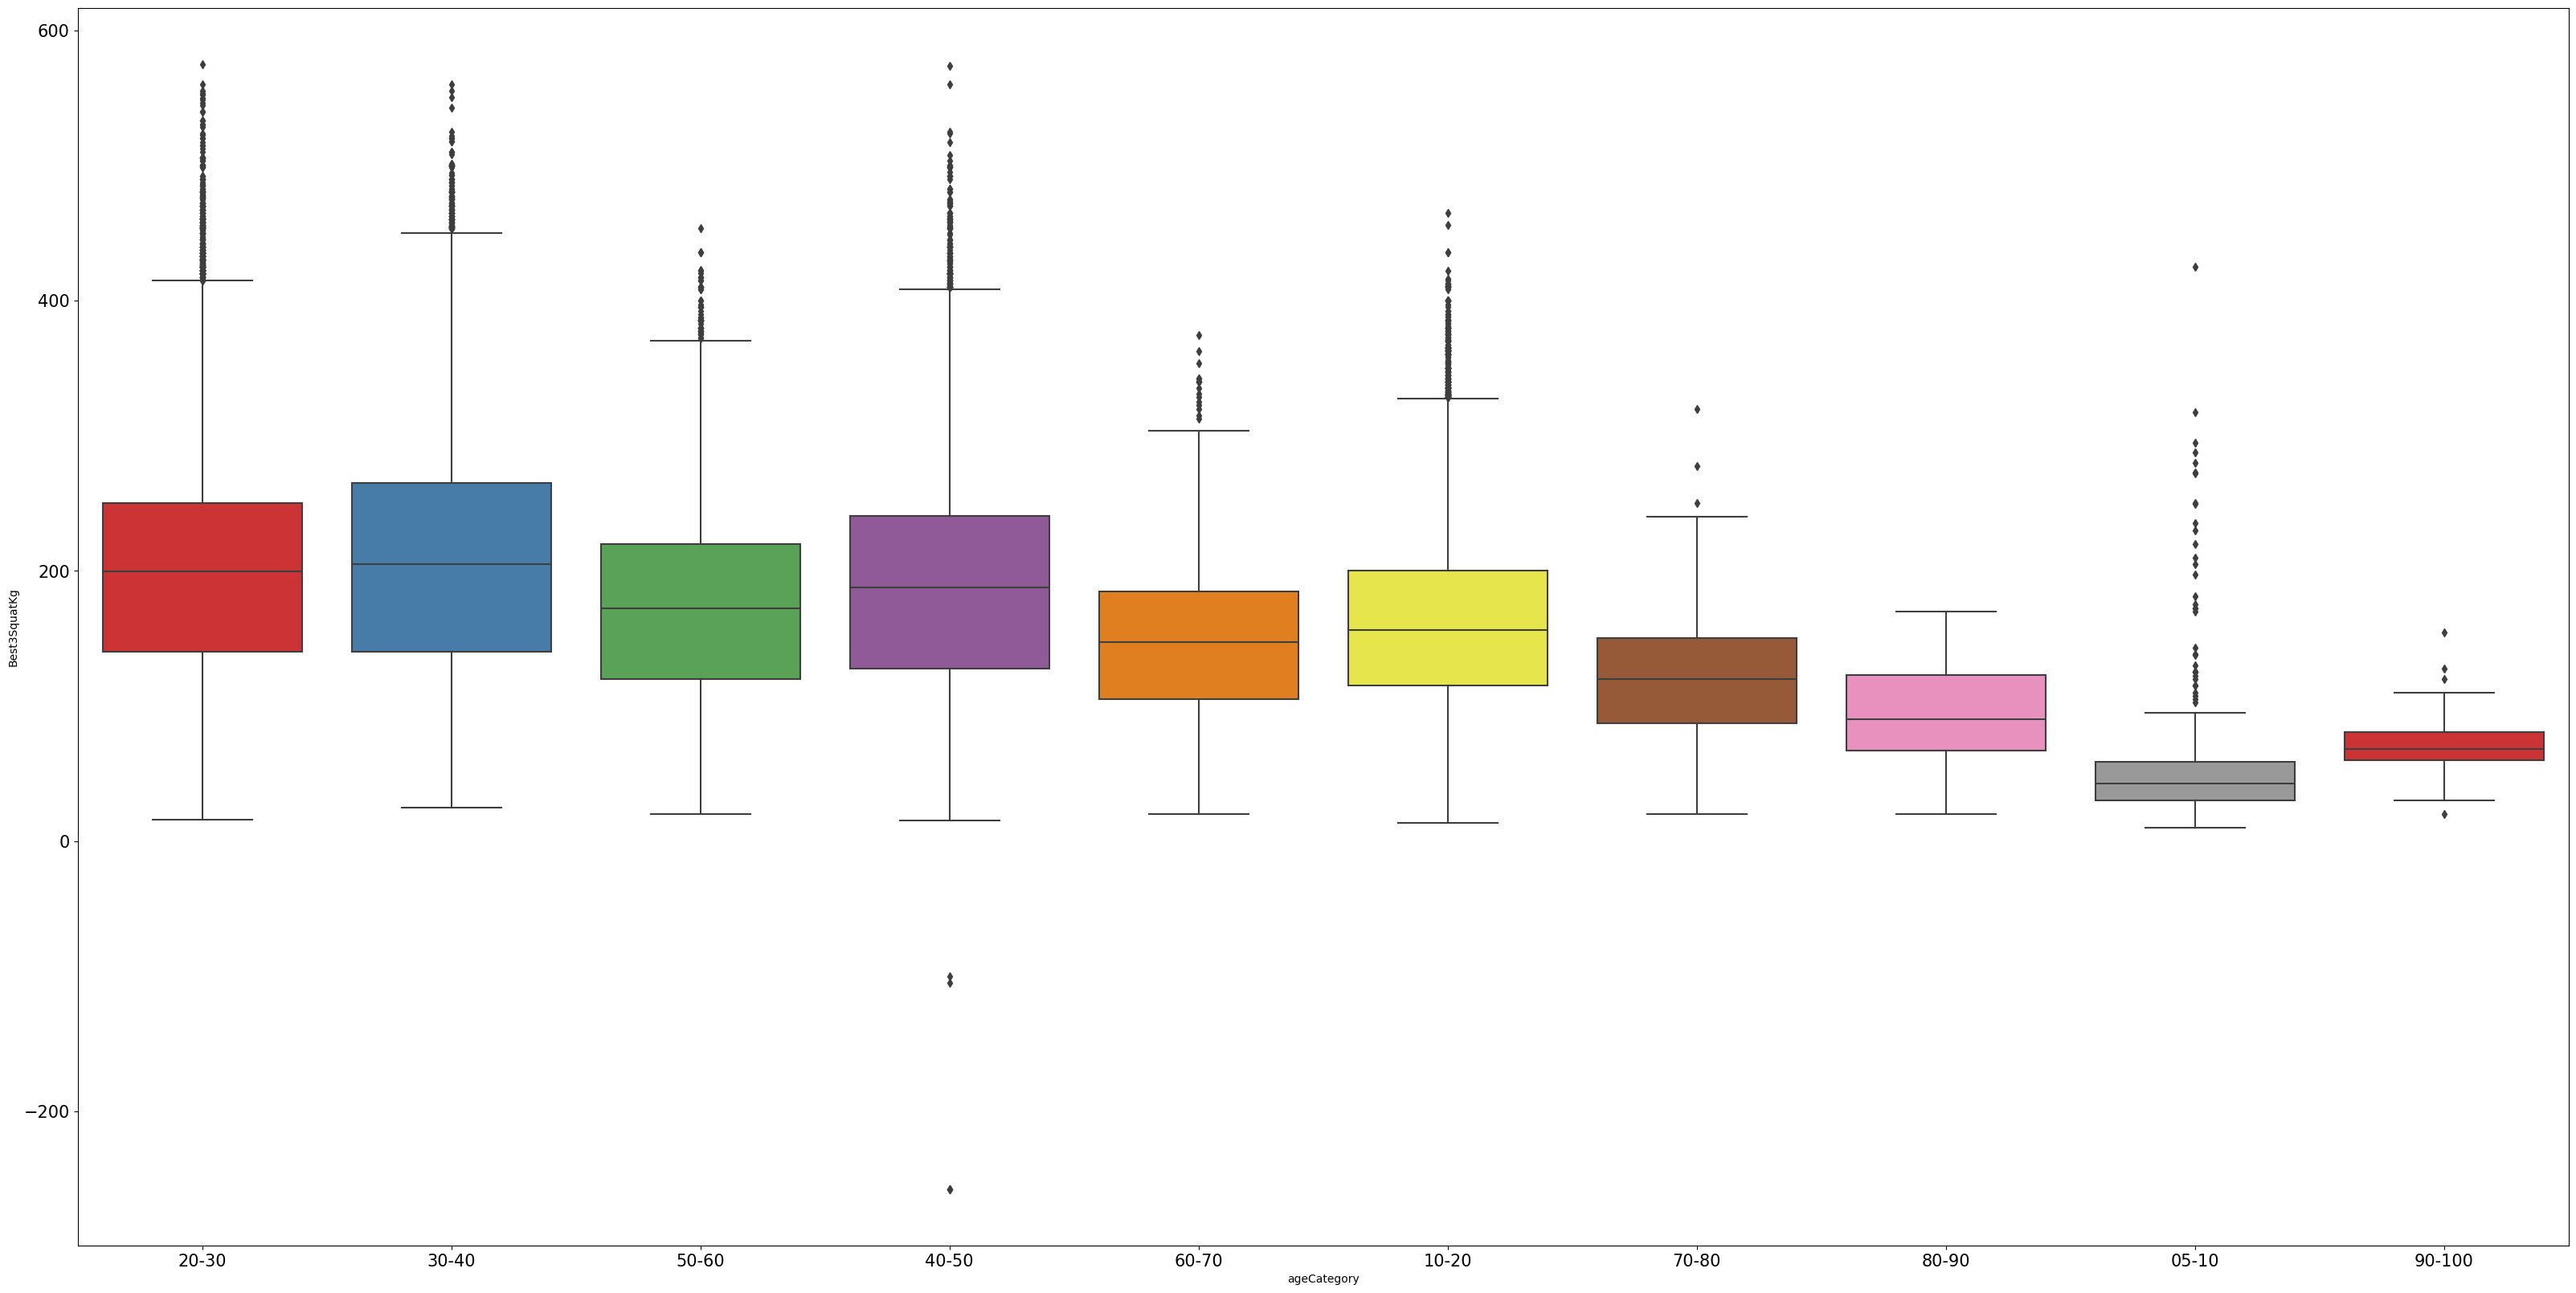

In [30]:
firstPlace_cleaned = firstPlace.dropna(subset=['ageCategory', 'Best3SquatKg'])

plt.figure(figsize=(40,20))
plt.tight_layout()
sns.boxplot(data=firstPlace_cleaned, x="ageCategory", y="Best3SquatKg", palette="Set1")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

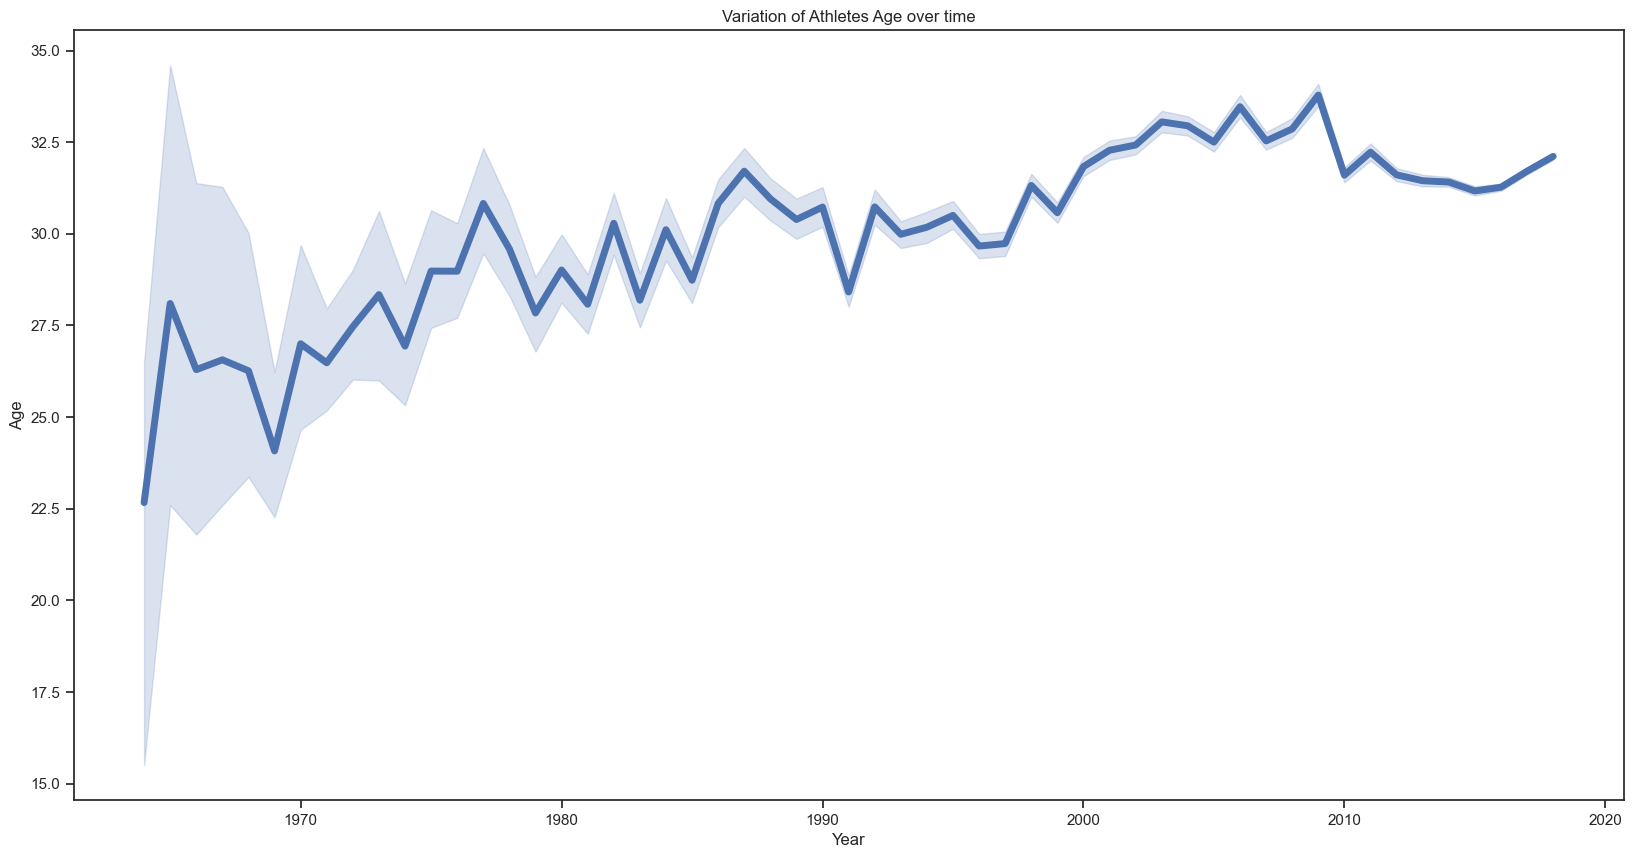

In [31]:
plt.figure(figsize=(20, 10))
sns.set(style="ticks", rc={"lines.linewidth": 5})
sns.lineplot(x='Year',y='Age', data=openpl)
plt.title('Variation of Athletes Age over time')
plt.show()

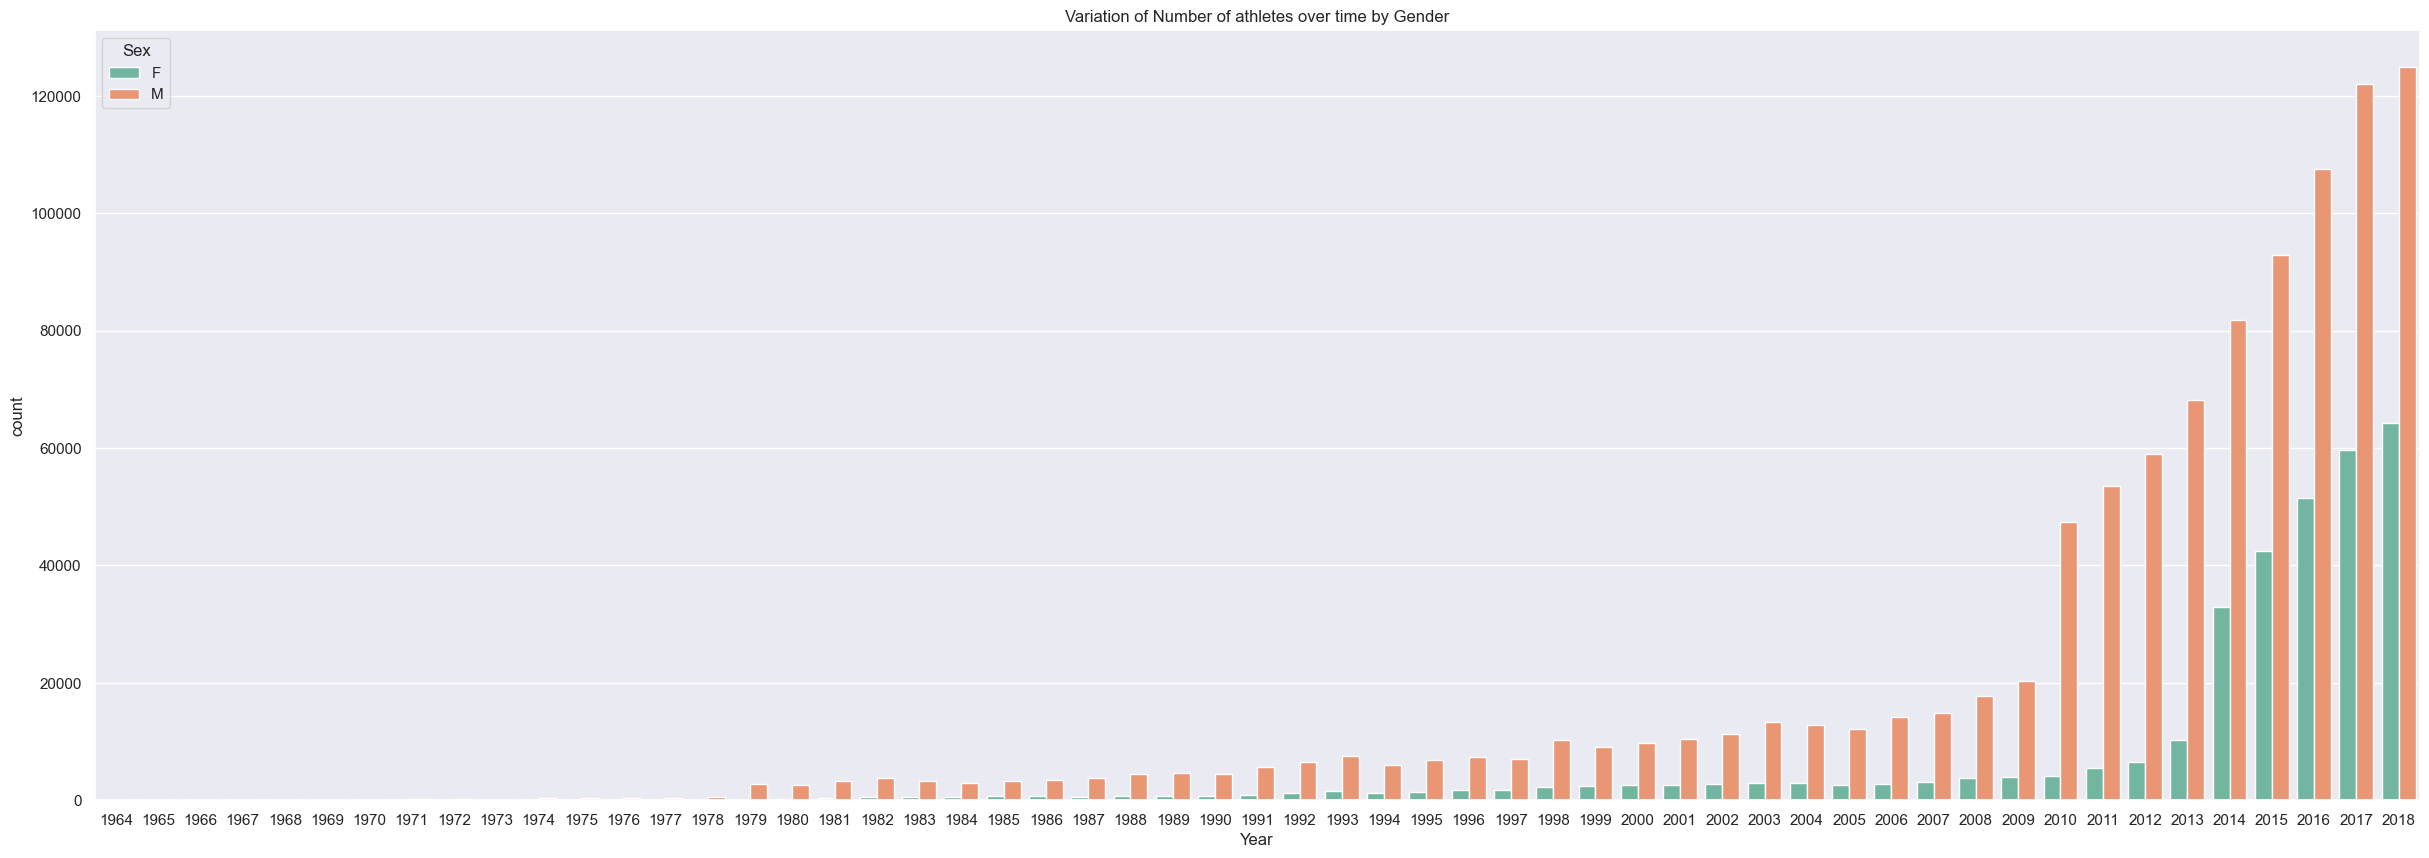

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize=(30, 10))
sns.countplot(x='Year', data=openpl, hue='Sex', palette='Set2')
plt.title('Variation of Number of athletes over time by Gender')
plt.show()

In [33]:
#number of female lifters participating drastically increased much later around 2014 compared to male lifters in 2010

#Absolute strength by bodyweight and equipment

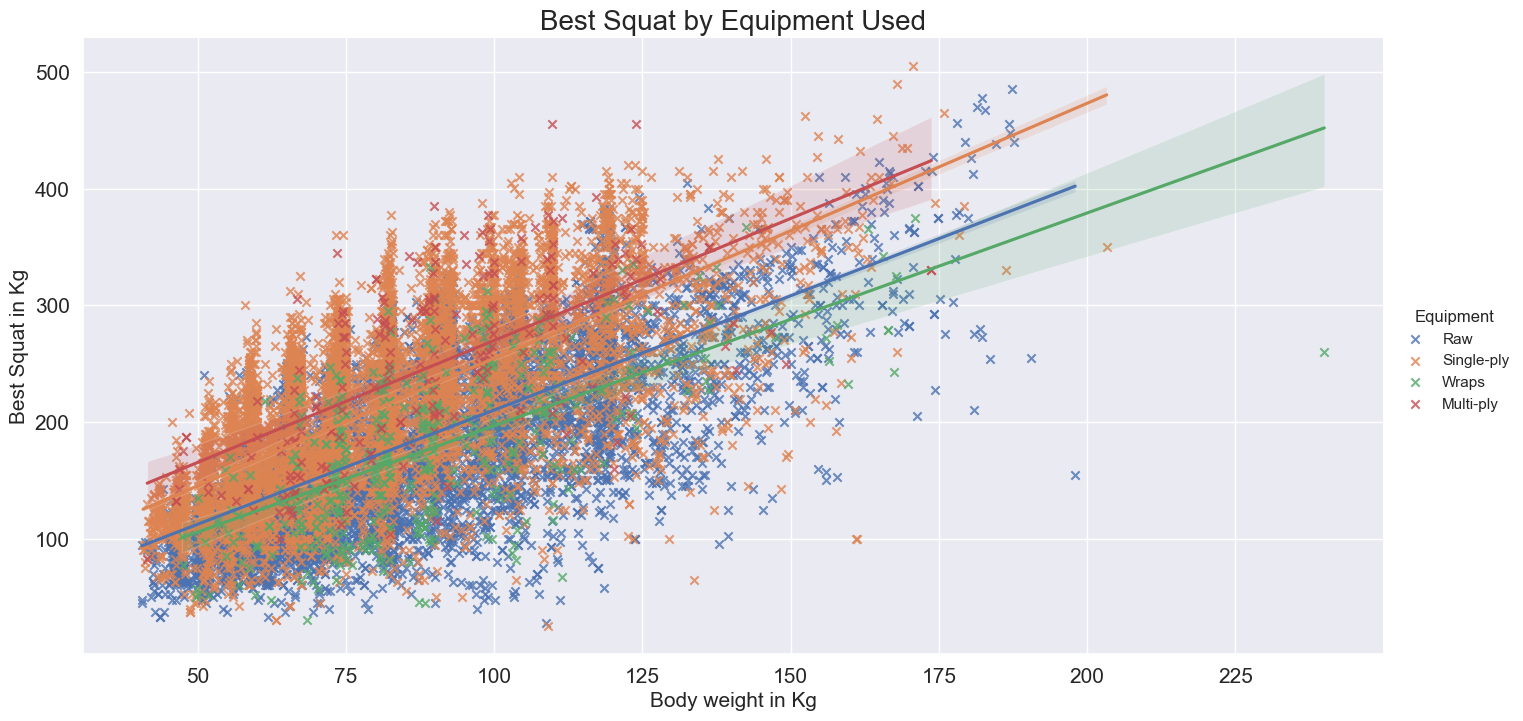

Equipment Used by Lifters:

Equipment
Single-ply    730084
Raw           440806
Wraps          99474
Multi-ply      64365
Name: count, dtype: int64


In [34]:
sns.lmplot(x='BodyweightKg',
           y='Best3SquatKg',
           data=openpl.dropna(),
           hue='Equipment',
           markers='x',
           height=7,
           aspect=2)
plt.title('Best Squat by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Best Squat in Kg',fontsize=15)
plt.xlabel('Body weight in Kg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(openpl['Equipment'].dropna().value_counts())

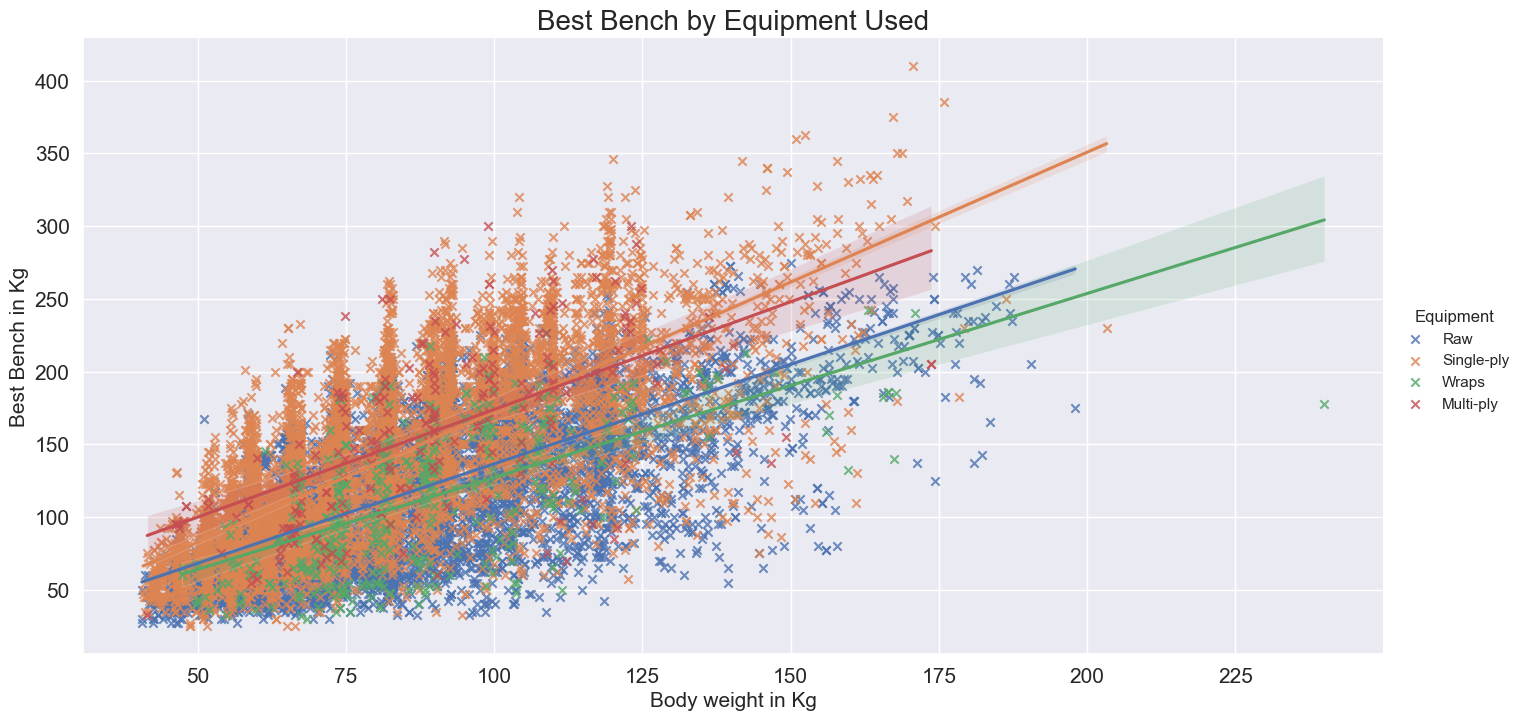

Equipment Used by Lifters:

Equipment
Single-ply    730084
Raw           440806
Wraps          99474
Multi-ply      64365
Name: count, dtype: int64


In [35]:
#Best bench by equipment
sns.lmplot(x='BodyweightKg',
           y='Best3BenchKg',
           data=openpl.dropna(),
           hue='Equipment',
           markers='x',
           height=7,
           aspect=2)
plt.title('Best Bench by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Best Bench in Kg',fontsize=15)
plt.xlabel('Body weight in Kg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(openpl['Equipment'].dropna().value_counts())

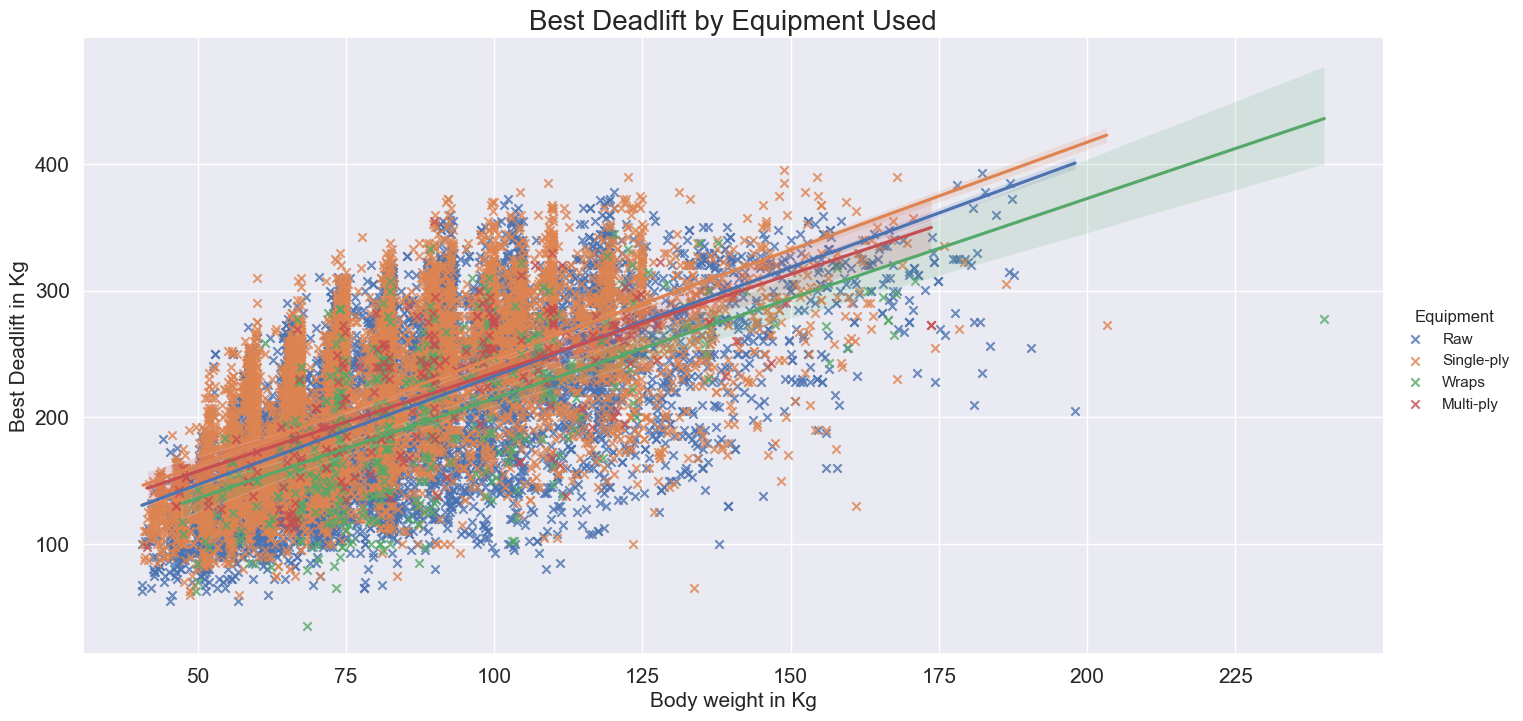

Equipment Used by Lifters:

Equipment
Single-ply    730084
Raw           440806
Wraps          99474
Multi-ply      64365
Name: count, dtype: int64


In [36]:
#Best deadlift by equipment
sns.lmplot(x='BodyweightKg',
           y='Best3DeadliftKg',
           data=openpl.dropna(),
           hue='Equipment',
           markers='x',
           height=7,
           aspect=2)
plt.title('Best Deadlift by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Best Deadlift in Kg',fontsize=15)
plt.xlabel('Body weight in Kg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(openpl['Equipment'].dropna().value_counts())

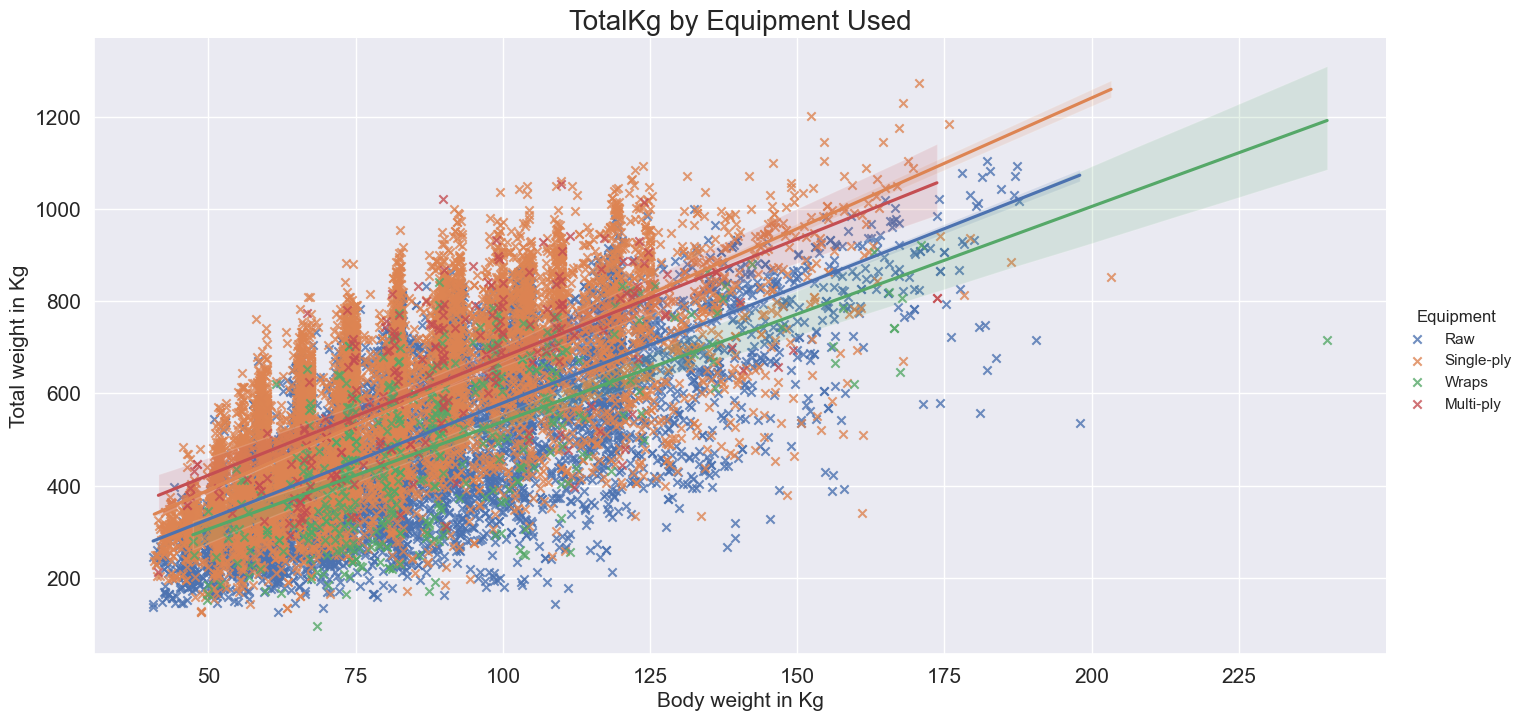

Equipment Used by Lifters:

Equipment
Single-ply    730084
Raw           440806
Wraps          99474
Multi-ply      64365
Name: count, dtype: int64


In [37]:
sns.lmplot(x='BodyweightKg',
           y='TotalKg',
           data=openpl.dropna(),
           hue='Equipment',
           markers='x',
           height=7,
           aspect=2)
plt.title('TotalKg by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Total weight in Kg',fontsize=15)
plt.xlabel('Body weight in Kg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(openpl['Equipment'].dropna().value_counts())

# Data Preprocessing

In [38]:
openpl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1334729 entries, 0 to 1423353
Data columns (total 37 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Name             1334729 non-null  object        
 1   Sex              1334729 non-null  object        
 2   Event            1334729 non-null  object        
 3   Equipment        1334729 non-null  object        
 4   Age              755830 non-null   float64       
 5   AgeClass         755656 non-null   object        
 6   Division         1326559 non-null  object        
 7   BodyweightKg     1319131 non-null  float64       
 8   WeightClassKg    1322975 non-null  object        
 9   Squat1Kg         319544 non-null   float64       
 10  Squat2Kg         315483 non-null   float64       
 11  Squat3Kg         306362 non-null   float64       
 12  Best3SquatKg     955021 non-null   float64       
 13  Bench1Kg         478572 non-null   float64       
 14  Bench2K

In [39]:
openpl.isnull().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
Age                 578899
AgeClass            579073
Division              8170
BodyweightKg         15598
WeightClassKg        11754
Squat1Kg           1015185
Squat2Kg           1019246
Squat3Kg           1028367
Best3SquatKg        379708
Bench1Kg            856157
Bench2Kg            862239
Bench3Kg            876778
Best3BenchKg        139080
Deadlift1Kg         990058
Deadlift2Kg         997295
Deadlift3Kg        1012825
Best3DeadliftKg     329011
TotalKg             101591
Place                    0
Wilks               110357
McCulloch           110510
Glossbrenner        110357
IPFPoints           139810
Tested              319989
Country             952101
Federation               0
Date                     0
MeetCountry              0
MeetState           473746
MeetName                 0
Month                    0
Year                     0
ageCategory         578905
d

In [40]:
openpl.Event.value_counts()

Event
SBD    992477
B      252178
D       55592
BD      26217
S        4745
SB       2246
SD       1274
Name: count, dtype: int64

In [41]:
openpl.head()
# To be dropped- ["Name", "Event", "AgeClass", "Division", "WeightClassKg", "Squat1Kg", "Squat2Kg", "Squat3Kg", "Bench1Kg", "Bench2Kg", "Bench3Kg", "Deadlift1Kg", "Deadlift2Kg", "Deadlift3Kg", "TotalKg",
# "Tested",	"Country", "Federation", "Date", "MeetCountry", "MeetState", "MeetName", "Month", "Year", "Age", "Wilks", "McCulloch", "Glossbrenner", "IPFPoints"]
# Outliers removal- ["BodyweightKg", "Best3SquatKg", "Best3BenchKg", "Best3DeadliftKg", "ageCategory", ]

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName,Month,Year,ageCategory
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,92.5,105.0,105.0,45.0,50.0,55.0,55.0,110.0,120.0,130.0,130.0,290.0,4,324.16,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,10,2018,20-30
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,110.0,120.0,120.0,55.0,62.5,67.5,67.5,130.0,140.0,145.0,145.0,332.5,2,378.07,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,10,2018,20-30
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,NaN,NaN,NaN,27.5,32.5,-35.0,32.5,NaN,NaN,NaN,NaN,32.5,1,38.56,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,10,2018,40-50
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,-105.0,105.0,105.0,67.5,72.5,-75.0,72.5,132.5,-140.0,-140.0,132.5,310.0,3,345.61,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,10,2018,20-30
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,130.0,140.0,140.0,70.0,75.0,80.0,80.0,150.0,160.0,170.0,170.0,390.0,3,321.25,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,10,2018,40-50


In [42]:
openpl.AgeClass.value_counts()

AgeClass
24-34     234183
20-23     131166
35-39      63816
40-44      61953
18-19      60616
45-49      44247
16-17      44150
50-54      34917
13-15      24473
55-59      21212
60-64      14843
65-69       8379
70-74       5589
5-12        2673
75-79       2385
80-999      1054
Name: count, dtype: int64

In [43]:
openpl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1334729 entries, 0 to 1423353
Data columns (total 37 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Name             1334729 non-null  object        
 1   Sex              1334729 non-null  object        
 2   Event            1334729 non-null  object        
 3   Equipment        1334729 non-null  object        
 4   Age              755830 non-null   float64       
 5   AgeClass         755656 non-null   object        
 6   Division         1326559 non-null  object        
 7   BodyweightKg     1319131 non-null  float64       
 8   WeightClassKg    1322975 non-null  object        
 9   Squat1Kg         319544 non-null   float64       
 10  Squat2Kg         315483 non-null   float64       
 11  Squat3Kg         306362 non-null   float64       
 12  Best3SquatKg     955021 non-null   float64       
 13  Bench1Kg         478572 non-null   float64       
 14  Bench2K

In [44]:
openpl["WeightClassKg"] = pd.to_numeric(openpl["WeightClassKg"], errors='coerce')
openpl["BodyweightKg"].fillna(openpl["WeightClassKg"], inplace=True)


In [45]:
openpl.Event.value_counts()

Event
SBD    992477
B      252178
D       55592
BD      26217
S        4745
SB       2246
SD       1274
Name: count, dtype: int64

In [46]:
openpl.Equipment.value_counts()

Equipment
Single-ply    730084
Raw           440806
Wraps          99474
Multi-ply      64365
Name: count, dtype: int64

In [47]:
def remove_outliers(cols):
    for col in cols:
        quantiles = openpl[col].quantile([0.25, 0.5, 0.75])
        IQR = quantiles[0.75] - quantiles[0.25]
        up_lim = quantiles[0.5] + 1.5*IQR
        low_lim = quantiles[0.5] - 1.5*IQR

        filtered_data = openpl[(openpl[col] >= low_lim) & (openpl[col] <= up_lim)]

    return filtered_data

<Axes: ylabel='Age'>

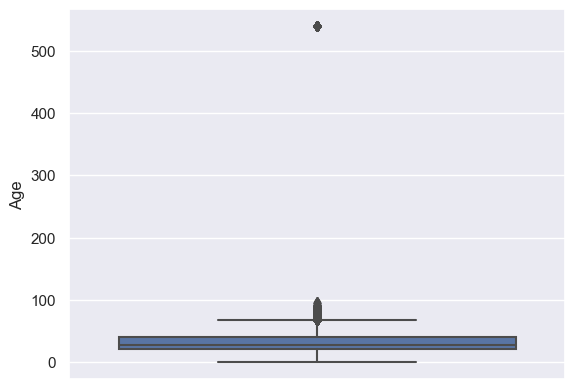

In [48]:
sns.boxplot(data=openpl, y="Age")

In [49]:
openpl.AgeClass.value_counts()

AgeClass
24-34     234183
20-23     131166
35-39      63816
40-44      61953
18-19      60616
45-49      44247
16-17      44150
50-54      34917
13-15      24473
55-59      21212
60-64      14843
65-69       8379
70-74       5589
5-12        2673
75-79       2385
80-999      1054
Name: count, dtype: int64

<Axes: ylabel='BodyweightKg'>

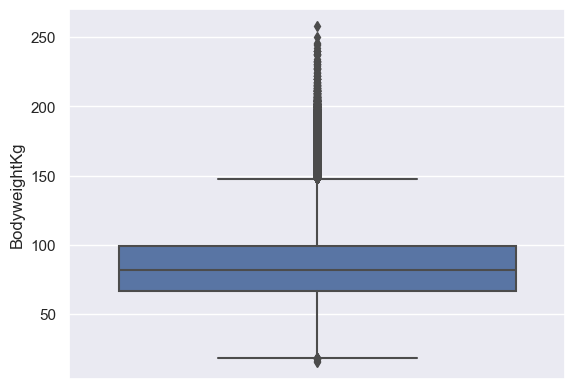

In [50]:
sns.boxplot(data=openpl, y="BodyweightKg")

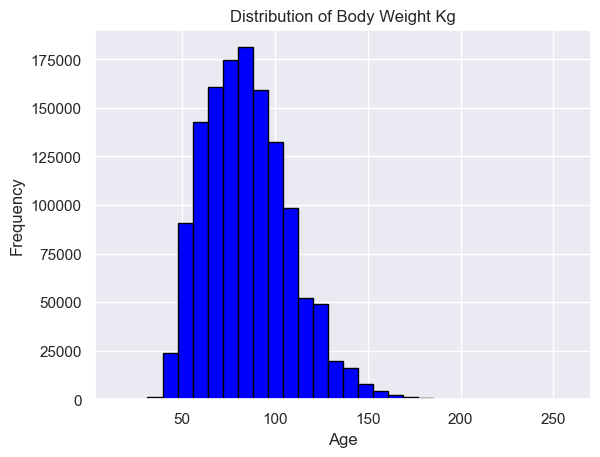

In [51]:
plt.hist(openpl['BodyweightKg'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Body Weight Kg')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [52]:
openpl.WeightClassKg.unique()

array([ 60. ,  56. , 110. ,  75. ,  82.5,  52. ,  67.5,  90. ,   nan,
       125. , 100. , 140. ,  48. ,  44. , 105. ,  74. ,  93. , 120. ,
        63. ,  83. ,  84. ,  57. ,  72. ,  47. ,  59. ,  66. ,  53. ,
        43. ,  90.7,  36. ,  40. ,  46. ,  49. , 145. ,  50. ,  65. ,
        80. ,  35. , 155. ,  39. ,  68. ,  50.5,  55.5,  58.5,  70. ,
        47.5, 136. ,  55. ,  54.4,  58.9,  63.5,  68.9,  78.9,  56.7,
        83.9, 102. , 113.4, 127. , 117.5, 101. , 103. ,  67. ,  82. ,
        36.2,  52.5,  72.5,  81.6, 104.3, 117.9,  79.3,  49.9,  57.1,
        70.3,  77.1,  92.9,  68.5,  69.5,  70.5,  71.5,  73.5,  74.5,
        75.5,  76.5,  77.5,  78.5,  79.5,  80.5,  81.5,  77. ,  85. ,
       113.5,  62.5,  57.5,  54. ,  92.5, 143. ,  61.2,  87.5,  61. ,
        62. ,  64. ,  67.3,  73. ,  82.3, 123. ,  30. ,  45.3,  99.7,
       104. , 106. , 107. , 108. , 109. , 111. ,  42. ,  56.4,  33. ,
       101.5, 122.5,  58. , 126. ,  69.8,  76.2,  88.9,  95.2, 160. ,
        65.7, 118. ,

In [53]:
def change_to_abs(cols):
    for col in cols:
        openpl[col] = openpl[col].apply(lambda x: abs(x))
change_to_abs(['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',])

In [54]:
def best_exercise_values(dict: dict):
    for key, val in dict.items():
        openpl[key] = openpl[val].max(axis=1)

In [55]:
k = {
    'Best3SquatKg': ['Squat1Kg', 'Squat2Kg', 'Squat3Kg'],
    'Best3BenchKg': ['Bench1Kg', 'Bench2Kg', 'Bench3Kg'],
    'Best3DeadliftKg': ['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg']
    }
best_exercise_values(k)

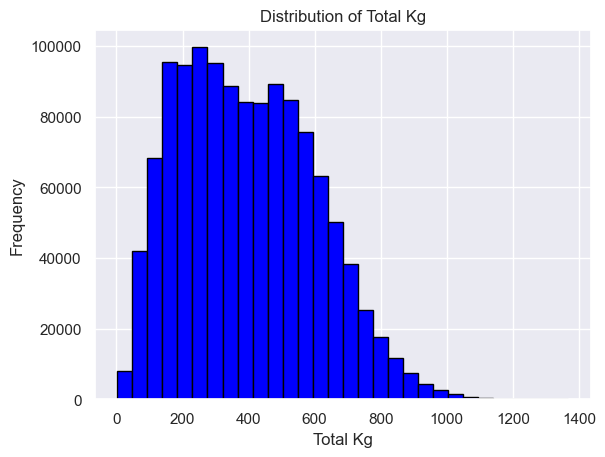

In [56]:
plt.hist(openpl['TotalKg'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Total Kg')
plt.xlabel('Total Kg')
plt.ylabel('Frequency')
plt.show()

In [57]:
openpl.TotalKg.describe()

count    1.233138e+06
mean     3.959154e+02
std      2.034155e+02
min      2.500000e+00
25%      2.290600e+02
50%      3.800000e+02
75%      5.425000e+02
max      1.367500e+03
Name: TotalKg, dtype: float64

In [58]:
openpl["Place"] = openpl["Place"].apply(lambda x: int(x) if x.isdigit() else -1)

In [59]:
openpl.drop(columns=["Name", "AgeClass", "Division", "WeightClassKg", "Squat1Kg", "Squat2Kg", "Squat3Kg", 
                     "Bench1Kg", "Bench2Kg", "Bench3Kg", "Deadlift1Kg", "Deadlift2Kg", "Deadlift3Kg",
                     "Tested",	"Country", "Federation", "Date", "MeetCountry", "MeetState", "MeetName", "Month", 
                     "Year", "Age", "Wilks", "McCulloch", "Glossbrenner", "IPFPoints", "Place", "Best3SquatKg", "Event"], inplace=True)
openpl = remove_outliers(["BodyweightKg", "Best3BenchKg", "Best3DeadliftKg", "TotalKg"])

In [60]:
openpl = openpl[(openpl["ageCategory"]!="05-10") & (openpl["ageCategory"]!="80-90") & (openpl["ageCategory"]!="90-100")]

In [61]:
openpl.ageCategory.value_counts()

ageCategory
20-30    243173
10-20    138463
30-40    129536
40-50     97980
50-60     52924
60-70     22179
70-80      7682
Name: count, dtype: int64

In [62]:
openpl.head()

,Sex,Equipment,BodyweightKg,Best3BenchKg,Best3DeadliftKg,TotalKg,ageCategory
0,F,Wraps,59.8,55.0,130.0,290.0,20-30
1,F,Wraps,58.5,67.5,145.0,332.5,20-30
2,F,Raw,55.4,35.0,NaN,32.5,40-50
3,F,Wraps,60.0,75.0,140.0,310.0,20-30
4,F,Wraps,104.0,80.0,170.0,390.0,40-50


In [63]:
openpl.isnull().sum()
openpl.dropna(inplace=True)

In [64]:
#one-hot encoding
categorical_var = ["Sex", "Equipment", "ageCategory"]
openpl = pd.get_dummies(openpl, columns=categorical_var, drop_first=True)

In [65]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['BodyweightKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg']
scaler = MinMaxScaler()
openpl[columns_to_scale] = scaler.fit_transform(openpl[columns_to_scale])

# Modeling

In [815]:
openpl.head(2)

,BodyweightKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Sex_M,Equipment_Raw,Equipment_Single-ply,Equipment_Wraps,ageCategory_20-30,ageCategory_30-40,ageCategory_40-50,ageCategory_50-60,ageCategory_60-70,ageCategory_70-80
0,0.166127,0.084829,0.199615,0.309835,False,False,False,True,True,False,False,False,False,False
1,0.160111,0.106829,0.225857,0.362213,False,False,False,True,True,False,False,False,False,False


## Linear Regression

In [817]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = openpl.drop('TotalKg', axis=1)
y = openpl['TotalKg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

grid_search = GridSearchCV(linear_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print("Best Parameters:", best_params)
print("Best Model:", best_model)

Best Parameters: {'fit_intercept': True, 'normalize': False}
Best Model: LinearRegression(normalize=False)


In [819]:
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
r2_lr = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae_lr)
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)
print("R-squared (R2):", r2_lr)

Mean Absolute Error (MAE): 0.02753667340805517
Mean Squared Error (MSE): 0.002262228014293442
Root Mean Squared Error (RMSE): 0.047562884839898456
R-squared (R2): 0.9455904088637456


## Random Forest Regressor

In [821]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
rf_regressor.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

y_pred = rf_regressor.predict(X_test)

# print("Best Parameters:", best_params)
# print("Best Model:", best_model)

In [822]:
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
r2_rf = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2):", r2_rf)

Mean Absolute Error (MAE): 0.028411195751596247
Mean Squared Error (MSE): 0.002241038552008769
Root Mean Squared Error (RMSE): 0.047339608701475015
R-squared (R2): 0.9461000436008374


## XG Boost Regressor

In [823]:
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [824]:
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
r2_xgb = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae_xgb)
print("Mean Squared Error (MSE):", mse_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("R-squared (R2):", r2_xgb)

Mean Absolute Error (MAE): 0.02679055648343742
Mean Squared Error (MSE): 0.002068844529064868
Root Mean Squared Error (RMSE): 0.04548455264224183
R-squared (R2): 0.9502415387663504


## KNN Regressor

In [825]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Best Parameters: {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Best Model: KNeighborsRegressor(n_neighbors=10, weights='distance')


In [826]:
mae_knn = mean_absolute_error(y_test, y_pred)
mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
r2_knn = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae_knn)
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R2):", r2_knn)

Mean Absolute Error (MAE): 0.027337991045691012
Mean Squared Error (MSE): 0.0022387945277381792
Root Mean Squared Error (RMSE): 0.047315901425822794
R-squared (R2): 0.9461540153677377


## AdaBoost Regressor

In [827]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_regressor = AdaBoostRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(adaboost_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best Model: AdaBoostRegressor(learning_rate=0.1)


In [828]:
mae_adb = mean_absolute_error(y_test, y_pred)
mse_adb = mean_squared_error(y_test, y_pred)
rmse_adb = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
r2_adb = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae_adb)
print("Mean Squared Error (MSE):", mse_adb)
print("Root Mean Squared Error (RMSE):", rmse_adb)
print("R-squared (R2):", r2_adb)

Mean Absolute Error (MAE): 0.04080868091267996
Mean Squared Error (MSE): 0.003394526067824563
Root Mean Squared Error (RMSE): 0.05826256145952187
R-squared (R2): 0.9183571354060094


# Final Results

In [829]:
mae_all = [mae_lr, mae_rf, mae_xgb, mae_knn, mae_adb]
mse_all = [mse_lr, mse_rf, mse_xgb, mse_knn, mse_adb]
rmse_all = [rmse_lr, rmse_rf, rmse_xgb, rmse_knn, rmse_adb]
r2_all = [r2_lr, r2_rf, r2_xgb, r2_knn, r2_adb]

In [830]:
metrics_df = pd.DataFrame({"Mean Absoulte Error (MAE)":mae_all, "Mean Squared Error (MSE)":mse_all, "Root Mean Squared Error (RMSE)": rmse_all, "R-squared score": r2_all},
                          index=["Linear Regression", "Random Forest Regressor", "XG Boost Regressor", "KNN Regressor", "Ada Boost Regressor"])
metrics_df

,Mean Absoulte Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared score
Linear Regression,0.027537,0.002262,0.047563,0.945590
Random Forest Regressor,0.028411,0.002241,0.047340,0.946100
XG Boost Regressor,0.026791,0.002069,0.045485,0.950242
KNN Regressor,0.027338,0.002239,0.047316,0.946154
Ada Boost Regressor,0.040809,0.003395,0.058263,0.918357
